In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from astropy.visualization import hist
from tqdm import tqdm

%matplotlib inline

In [2]:
data = pd.read_csv('./data/crimes-in-boston/crimes_2018_with_days.csv')
data.columns

C:\Users\Alexey\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'REPORTING_AREA',
       'SHOOTING', 'OCCURRED_ON_DATE', 'DAY_OF_MONTH', 'MONTH', 'DAY_OF_WEEK',
       'HOUR', 'STREET', 'Lat', 'Long', 'Location', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

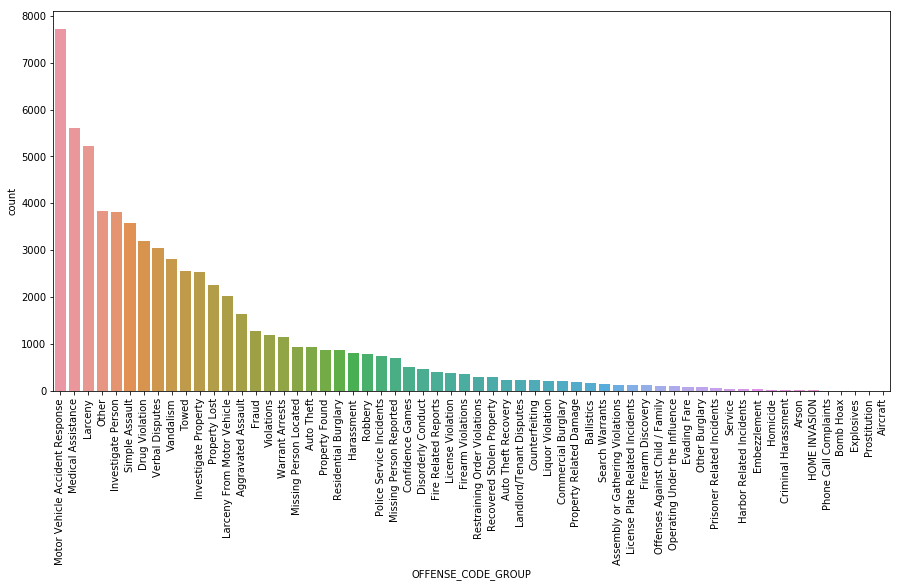

In [3]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data.OFFENSE_CODE_GROUP, order=data.OFFENSE_CODE_GROUP.value_counts().index)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [4]:
data.loc[data.REPORTING_AREA == ' ', 'REPORTING_AREA'] = np.NaN

In [5]:
tmp = data[~data.REPORTING_AREA.isna()]
tmp.REPORTING_AREA = tmp.REPORTING_AREA.astype(int)
n = int(np.floor(np.log2(len(tmp))))

C:\Users\Alexey\Miniconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


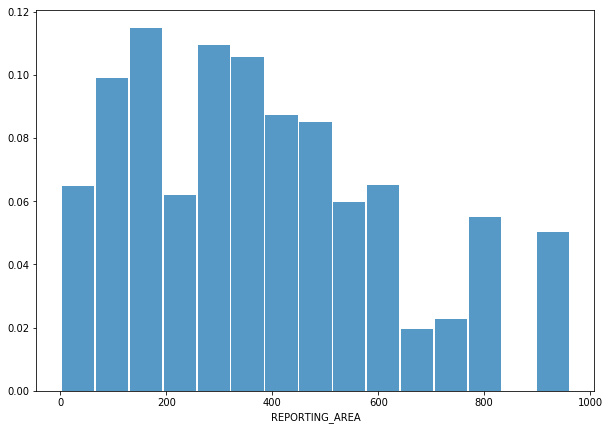

In [6]:
plt.figure(figsize=(10,7))
sns.distplot(tmp.REPORTING_AREA, bins=n, hist_kws={'alpha':0.75, 'histtype':'bar', 'rwidth':0.95, 
                                                   'weights':np.ones(len(tmp))/len(tmp), 'density':False}, kde=False)

0.3554869149166476


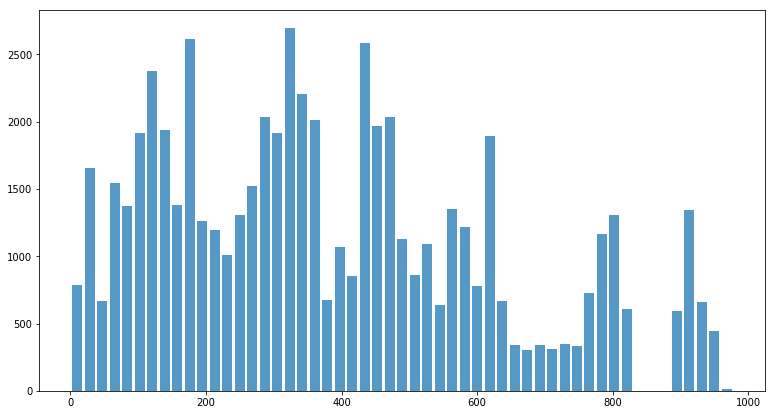

In [7]:
I = np.percentile(tmp.REPORTING_AREA, 0.25)
Q = np.percentile(tmp.REPORTING_AREA, 0.75)
h = 2*len(tmp)**(-1/3)*abs(I-Q)
print(h)
plt.figure(figsize=(13,7))
_ = hist(tmp.REPORTING_AREA, 'freedman', alpha=0.75, histtype='bar', rwidth=0.8)

In [8]:
tmp = data[~data.Lat.isna()]
tmp.Lat = tmp.Lat.astype(float)
n = int(np.floor(np.log2(len(tmp))))

C:\Users\Alexey\Miniconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


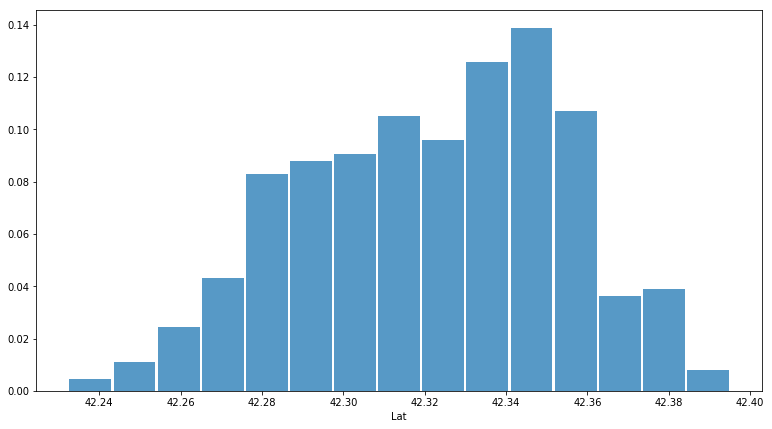

In [9]:
plt.figure(figsize=(13,7))
sns.distplot(tmp.Lat, bins=n, hist_kws={'alpha':0.75, 'histtype':'bar', 'rwidth':0.95,
                                       'weights':np.ones(len(tmp))/len(tmp), 'density':False}, kde=False)

0.0002953376368550977


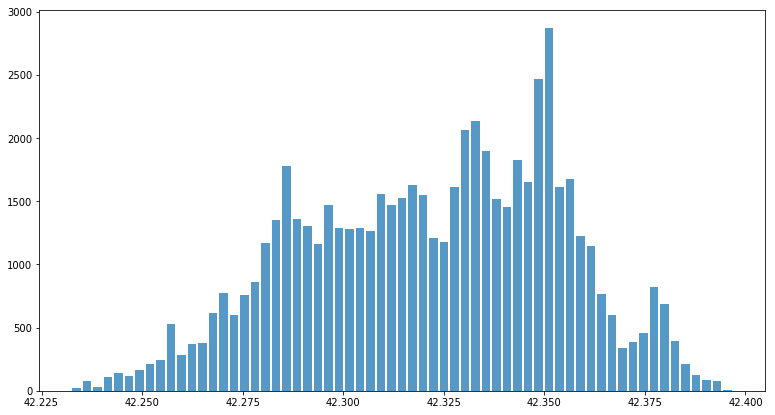

In [10]:
I = np.percentile(tmp.Lat, 0.25)
Q = np.percentile(tmp.Lat, 0.75)
h = 2*len(tmp)**(-1/3)*abs(I-Q)
print(h)
plt.figure(figsize=(13,7))
_ = hist(tmp.Lat, 'freedman', alpha=0.75, histtype='bar', rwidth=0.8)

In [11]:
tmp = data[~data.Long.isna()]
tmp.Long = tmp.Long.astype(float)
n = int(np.floor(np.log2(len(tmp))))

C:\Users\Alexey\Miniconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


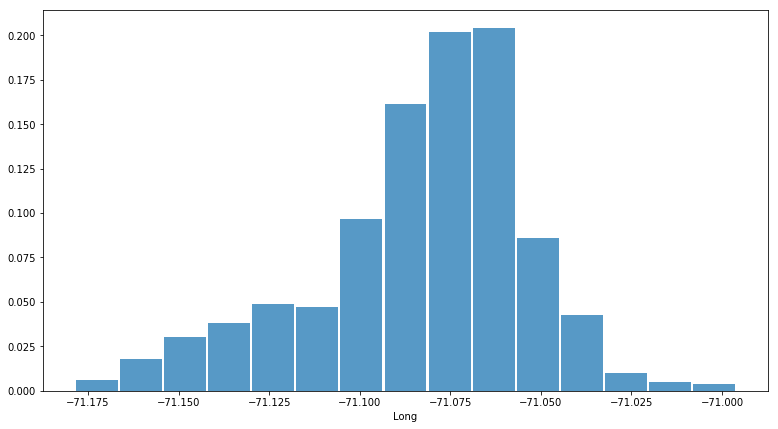

In [12]:
plt.figure(figsize=(13,7))
sns.distplot(tmp.Long, bins=n, hist_kws={'alpha':0.75, 'histtype':'bar', 'rwidth':0.95,
                                       'weights':np.ones(len(tmp))/len(tmp), 'density':False}, kde=False)

0.0002239033103888264


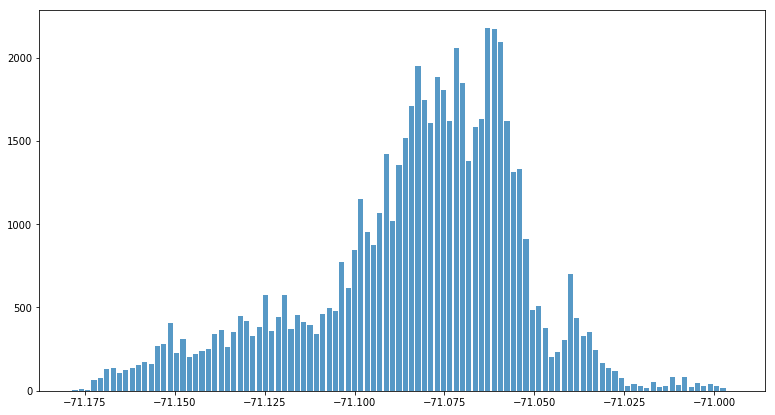

In [13]:
I = np.percentile(tmp.Long, 0.25)
Q = np.percentile(tmp.Long, 0.75)
h = 2*len(tmp)**(-1/3)*abs(I-Q)
print(h)
plt.figure(figsize=(13,7))
_ = hist(tmp.Long, 'freedman', alpha=0.75, histtype='bar', rwidth=0.8)

In [14]:
c = ['r', 'g', 'b', 'c', 'm', 'orange', 'purple', 'black', 'gray']

In [15]:
groups = tmp.OFFENSE_CODE_GROUP.value_counts().index

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 35.58it/s]


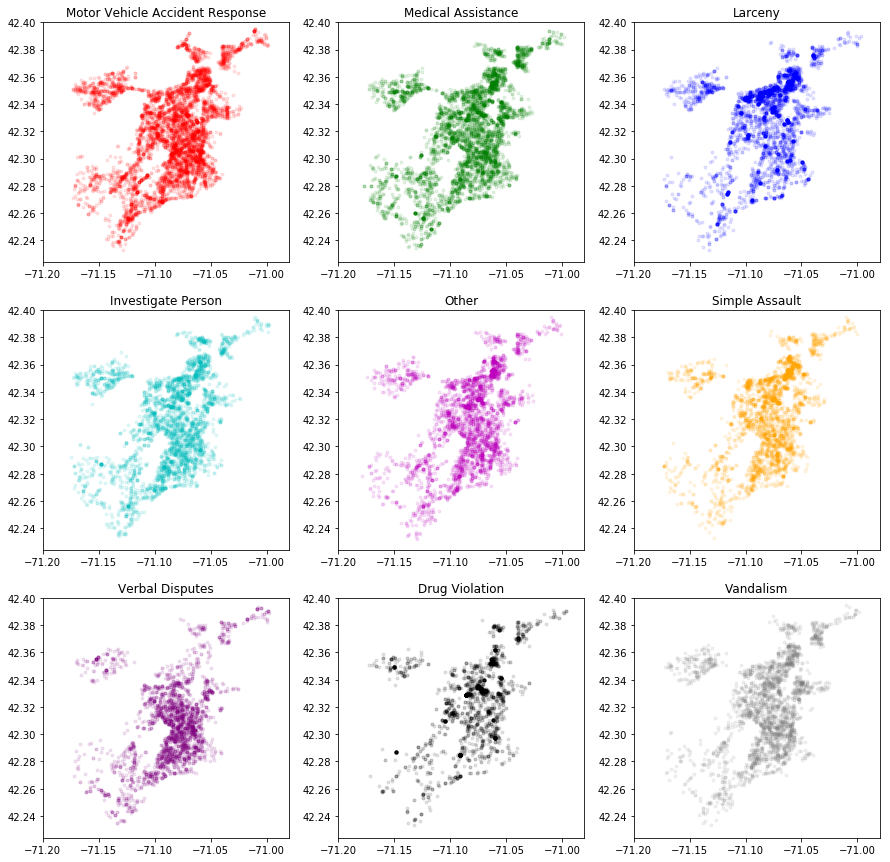

In [16]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
i = 0
j = 0
for g in tqdm(groups[:9]):
    if j%3 == 0 and j!=0 :
        i += 1
        j = 0
    t = tmp[tmp.OFFENSE_CODE_GROUP == g]
    ax[i,j].set_xlim(-71.2, -70.98)
    ax[i,j].set_ylim(42.224, 42.4)
    ax[i,j].scatter(t.Long, t.Lat, alpha=0.1, c=c[i*3+j], marker='.')
    ax[i,j].set_title(g)
    j += 1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 46.40it/s]


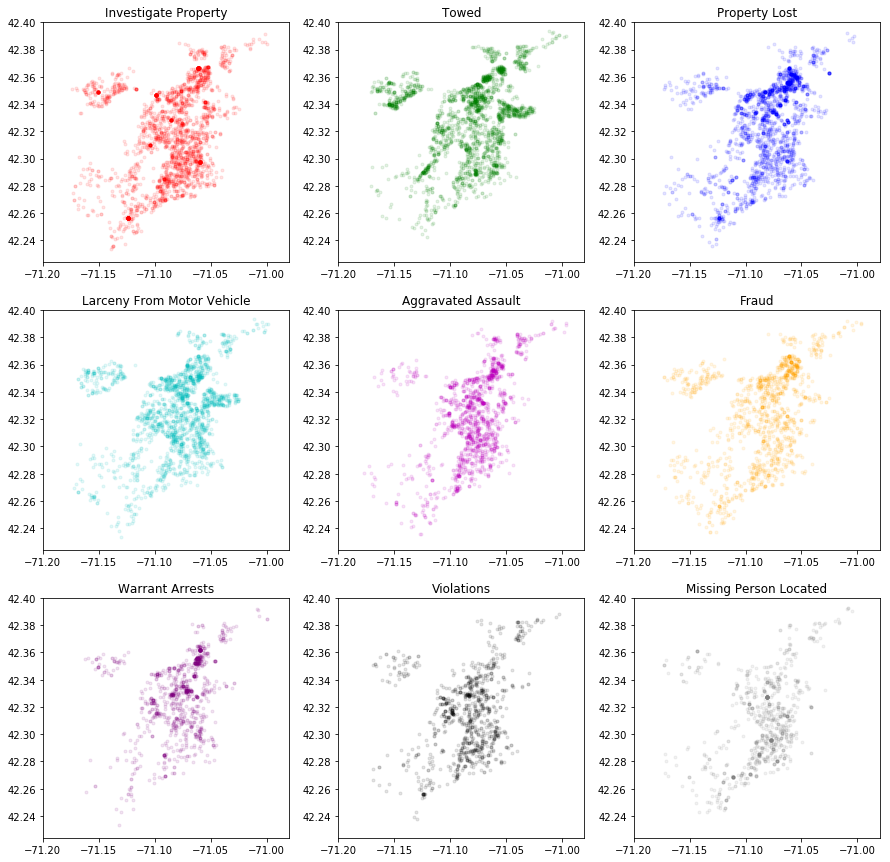

In [17]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
i = 0
j = 0
for g in tqdm(groups[9:18]):
    if j%3 == 0 and j!=0 :
        i += 1
        j = 0
    t = tmp[tmp.OFFENSE_CODE_GROUP == g]
    ax[i,j].set_xlim(-71.2, -70.98)
    ax[i,j].set_ylim(42.224, 42.4)
    ax[i,j].scatter(t.Long, t.Lat, alpha=0.1, c=c[i*3+j], marker='.')
    ax[i,j].set_title(g)
    j += 1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 69.67it/s]


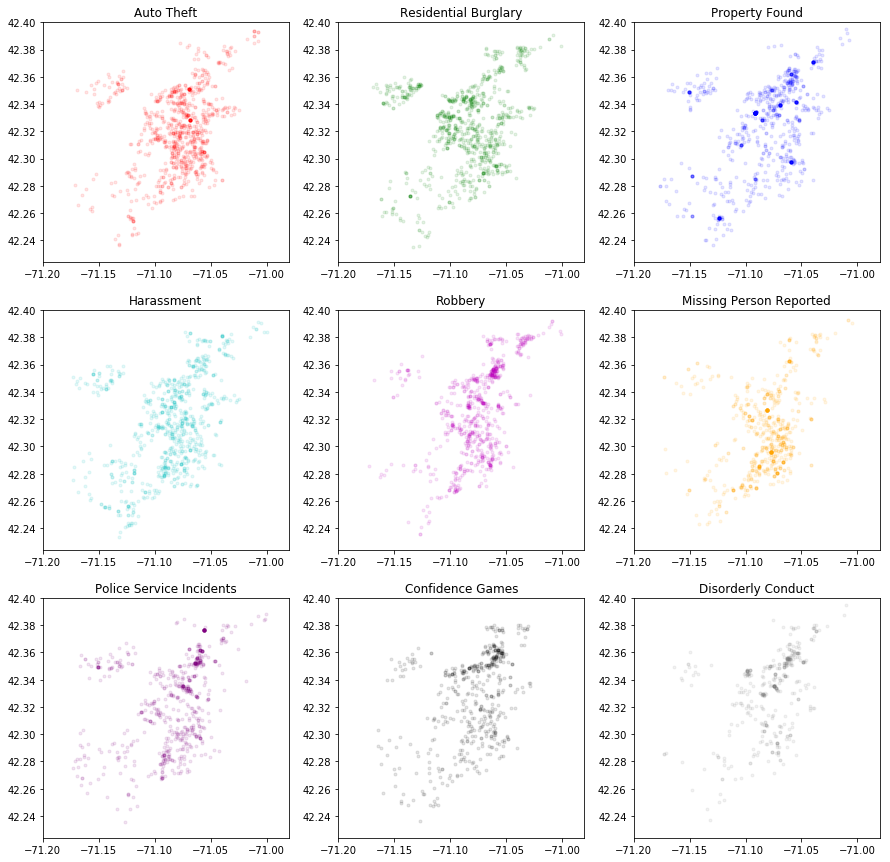

In [18]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
i = 0
j = 0
for g in tqdm(groups[18:27]):
    if j%3 == 0 and j!=0 :
        i += 1
        j = 0
    t = tmp[tmp.OFFENSE_CODE_GROUP == g]
    ax[i,j].set_xlim(-71.2, -70.98)
    ax[i,j].set_ylim(42.224, 42.4)
    ax[i,j].scatter(t.Long, t.Lat, alpha=0.1, c=c[i*3+j], marker='.')
    ax[i,j].set_title(g)
    j += 1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 77.72it/s]


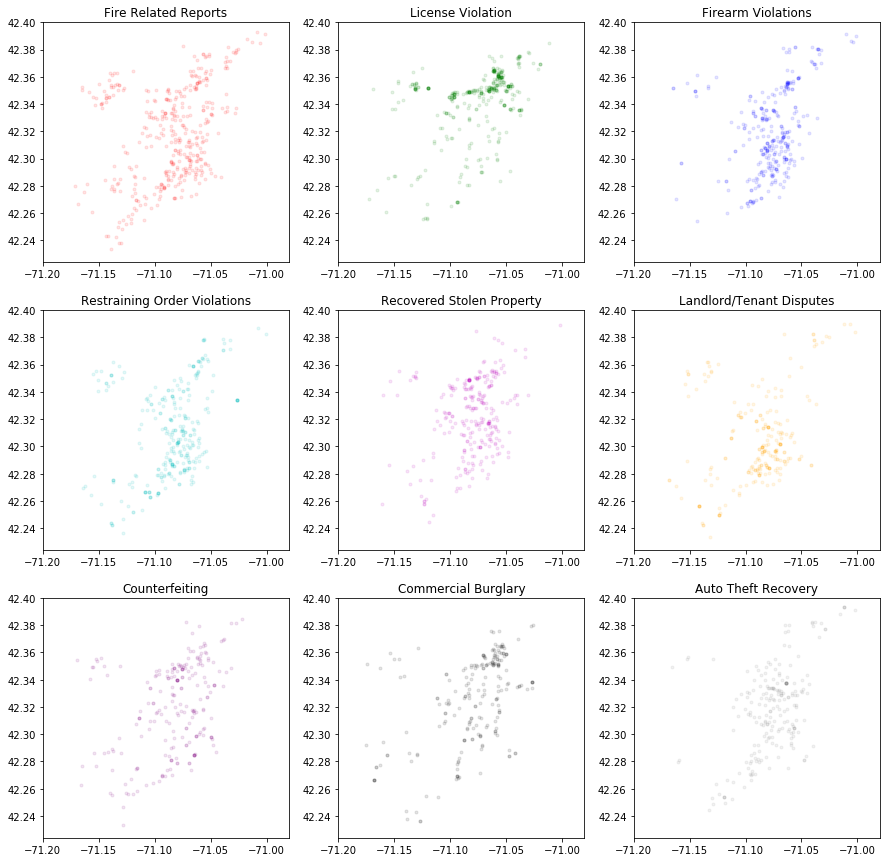

In [19]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
i = 0
j = 0
for g in tqdm(groups[27:36]):
    if j%3 == 0 and j!=0 :
        i += 1
        j = 0
    t = tmp[tmp.OFFENSE_CODE_GROUP == g]
    ax[i,j].set_xlim(-71.2, -70.98)
    ax[i,j].set_ylim(42.224, 42.4)
    ax[i,j].scatter(t.Long, t.Lat, alpha=0.1, c=c[i*3+j], marker='.')
    ax[i,j].set_title(g)
    j += 1